# 🎯 Project: Speech Emotion Classification

In [31]:
import os
import pandas as pd


emotions = {
    1: 'calm', 2: 'happy', 3: 'sad',
    4: 'angry', 5: 'fearful', 6: 'disgust'
}

## 📁 Step 1: Import Required Libraries

In [32]:

def extract_data_from_name(fname):
    parts = fname.split('.')[0].split('-')
    return {
        'filename': fname,
        'modality': int(parts[0]),
        'channel': int(parts[1]),  # 1 = speech, 2 = song
        'emotion_id': int(parts[2]),
        'emotion': emotions.get(int(parts[2]), 'unknown'),
        'intensity': int(parts[3]),
        'statement': int(parts[4]),
        'repeat': int(parts[5]),
        'actor': int(parts[6]),
        'gender': 'male' if int(parts[6]) % 2 != 0 else 'female'
    }

In [33]:
def create_dataframe(link):
    data = []
    for root, dirs, files in os.walk(link):
        for file in files:
            if file.endswith(".wav"):
                metadata = extract_data_from_name(file)
                metadata['path'] = os.path.join(root, file)
                data.append(metadata)
    return pd.DataFrame(data)
dataset_path = "/kaggle/input/training-data/training_data_mars"  
df = create_dataframe(dataset_path)

In [34]:
df.shape

(2452, 11)

## 📊 Step 2: Load and Explore Dataset

In [35]:
df.sample(10)

,filename,modality,channel,emotion_id,emotion,intensity,statement,repeat,actor,gender,path
1685,03-01-05-02-01-01-12.wav,3,1,5,fearful,2,1,1,12,female,/kaggle/input/training-data/training_data_mars...
35,03-02-06-02-02-01-02.wav,3,2,6,disgust,2,2,1,2,female,/kaggle/input/training-data/training_data_mars...
610,03-02-05-02-02-01-24.wav,3,2,5,fearful,2,2,1,24,female,/kaggle/input/training-data/training_data_mars...
2071,03-01-06-02-01-02-10.wav,3,1,6,disgust,2,1,2,10,female,/kaggle/input/training-data/training_data_mars...
301,03-02-05-01-02-02-11.wav,3,2,5,fearful,1,2,2,11,male,/kaggle/input/training-data/training_data_mars...
849,03-02-02-01-01-01-14.wav,3,2,2,happy,1,1,1,14,female,/kaggle/input/training-data/training_data_mars...
2265,03-01-07-01-02-02-03.wav,3,1,7,unknown,1,2,2,3,male,/kaggle/input/training-data/training_data_mars...
819,03-02-04-02-02-02-09.wav,3,2,4,angry,2,2,2,9,male,/kaggle/input/training-data/training_data_mars...
303,03-02-04-01-01-02-11.wav,3,2,4,angry,1,1,2,11,male,/kaggle/input/training-data/training_data_mars...
2302,03-01-05-02-01-02-13.wav,3,1,5,fearful,2,1,2,13,male,/kaggle/input/training-data/training_data_mars...


In [36]:
df.isnull().sum()

filename      0
modality      0
channel       0
emotion_id    0
emotion       0
intensity     0
statement     0
repeat        0
actor         0
gender        0
path          0
dtype: int64

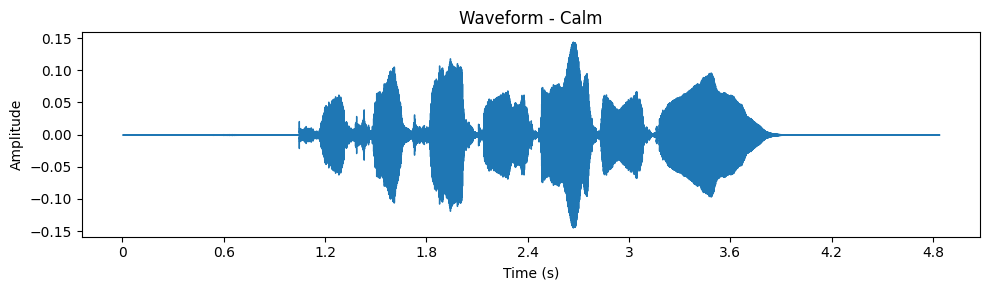

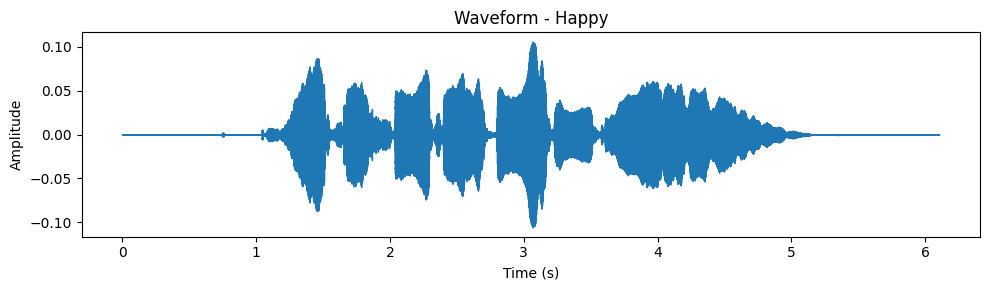

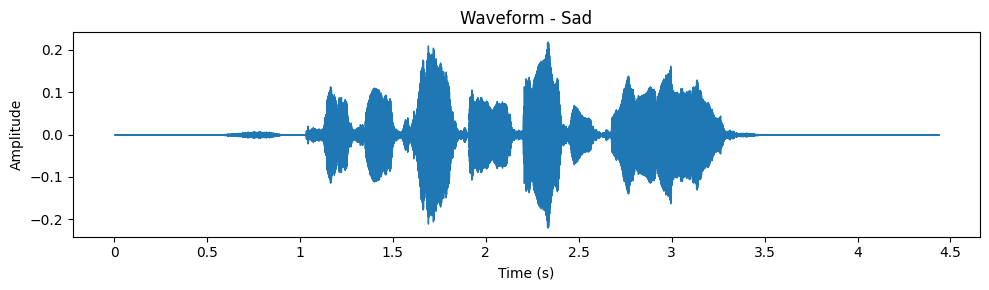

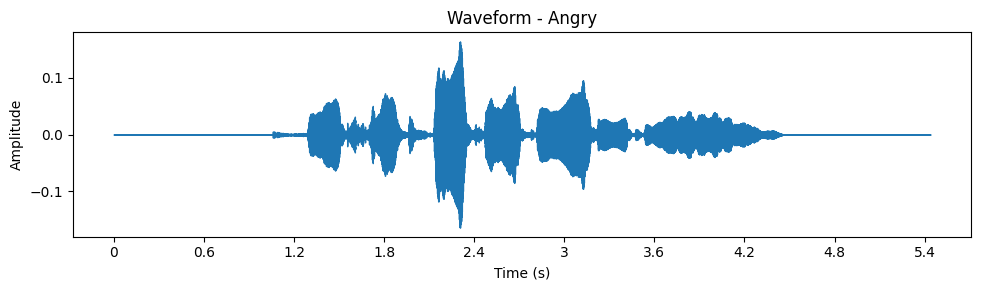

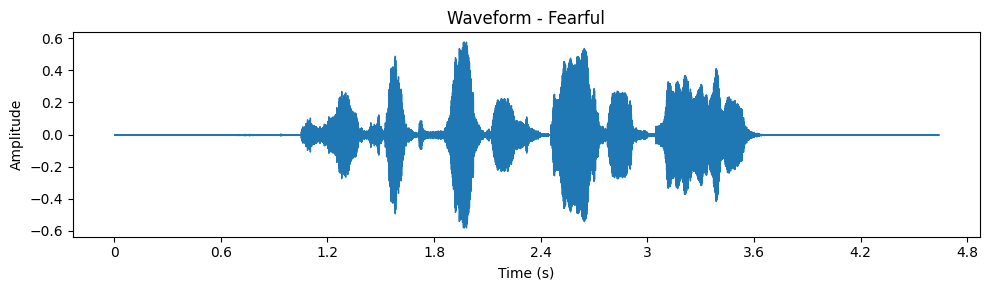

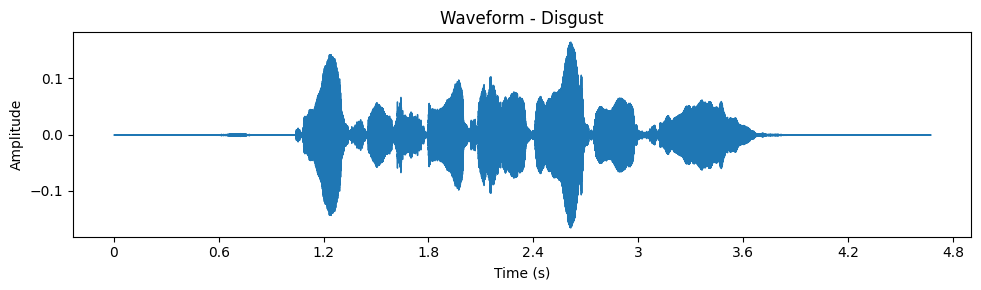

In [37]:

import librosa
import matplotlib.pyplot as plt 

for emotion in emotions.values():
    emotion_df = df[df['emotion'] == emotion]

    if not emotion_df.empty:
            row = emotion_df.iloc[0]  
            y, sr = librosa.load(row['path'], sr=None)

            plt.figure(figsize=(10, 3))
            librosa.display.waveshow(y, sr=sr)
            plt.title(f'Waveform - {emotion.capitalize()}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.tight_layout()
            plt.show()

In [38]:

df[['filename', 'emotion', 'path']].head()

,filename,emotion,path
0,03-02-05-02-01-01-02.wav,fearful,/kaggle/input/training-data/training_data_mars...
1,03-02-06-01-02-02-02.wav,disgust,/kaggle/input/training-data/training_data_mars...
2,03-02-03-02-01-02-02.wav,sad,/kaggle/input/training-data/training_data_mars...
3,03-02-03-01-02-02-02.wav,sad,/kaggle/input/training-data/training_data_mars...
4,03-02-04-02-01-01-02.wav,angry,/kaggle/input/training-data/training_data_mars...


## 🎵 Step 3: Extract Audio Features (MFCC, Chroma, ZCR, RMSE)

In [39]:
def extract_mfcc(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)  # average across time
    return mfcc_scaled

In [41]:
df['mfcc'] = df['path'].apply(extract_mfcc)

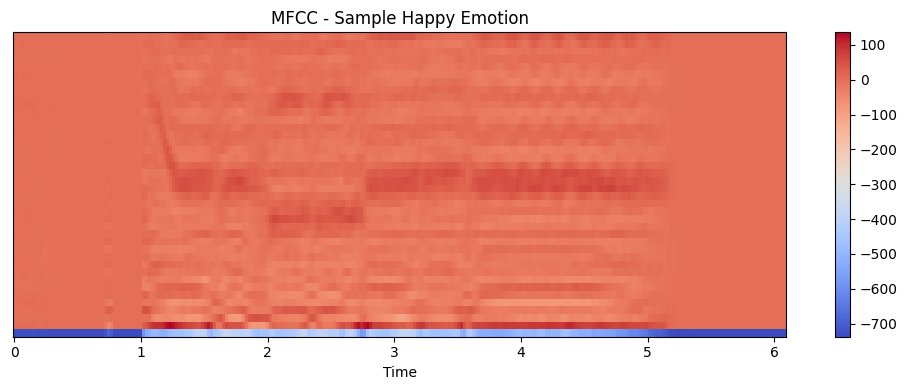

In [42]:
sample_path = df[df['emotion'] == 'happy']['path'].values[0]  # pick one

y, sr = librosa.load(sample_path)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC - Sample Happy Emotion')
plt.tight_layout()
plt.show()


## 🧹 Step 4: Preprocess Dataset and Labels

In [43]:
X = np.stack(df['mfcc'].values)

In [44]:

X.shape

(2452, 40)

In [46]:
print(df[['emotion', 'mfcc']].sample(20))

      emotion                                               mfcc
945     happy  [-688.70764, 104.49518, -7.838725, 18.201189, ...
708   fearful  [-548.03296, 89.20175, -19.560074, 7.244431, -...
1223  fearful  [-563.2866, 49.648838, -6.105738, 10.458235, -...
526       sad  [-513.95776, 62.991955, -25.675707, -2.268023,...
1221      sad  [-598.6889, 55.58522, -1.4237766, 7.4870486, 1...
1347    angry  [-736.81494, 70.96664, 4.8449197, 13.2525215, ...
1337      sad  [-568.1388, 70.80917, -8.7602215, 11.967098, -...
1395  unknown  [-583.4716, 63.945915, 4.8079705, 21.99493, 3....
550   fearful  [-481.55627, 72.50739, -13.362334, 7.7032685, ...
565      calm  [-606.2203, 95.74765, -6.315935, 5.752339, 6.2...
678     happy  [-582.7015, 63.862843, -31.936779, 4.313727, -...
776     happy  [-478.40942, 66.500374, -25.1022, -1.3930504, ...
739   fearful  [-535.65704, 92.44268, -26.790718, 6.499904, -...
809      calm  [-657.9106, 99.62838, -0.14824979, 8.279103, 0...
913     happy  [-533.3729

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['emotion'])   # convert string labels to numeric


In [48]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # stratify keeps emotion label proportions
)


## 🤖 Step 5: Build and Train the Model

In [49]:
!pip install tensorflow --quiet


In [50]:
# Reshape to (samples, height, width, channels) for 1D CNN
X_train_cnn = X_train[..., np.newaxis]  # shape: (num_train, 40, 1)
X_test_cnn = X_test[..., np.newaxis]    # shape: (num_test, 40, 1)


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

num_classes = len(np.unique(y))  # total number of emotion classes

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # classification layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


2025-06-20 19:30:13.386354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750447813.657299      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750447813.736227      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-20 19:30:29.809995: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,287 (286.28 KB)

 Trainable params: 73,095 (285.53 KB)

 Non-trainable params: 192 (768.00 B)

In [67]:
history = model.fit(
    X_train_cnn, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test_cnn, y_test)
)


Epoch 1/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9852 - loss: 0.0410 - val_accuracy: 0.7923 - val_loss: 1.0369
Epoch 2/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9899 - loss: 0.0252 - val_accuracy: 0.7963 - val_loss: 1.0125
Epoch 3/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9971 - loss: 0.0176 - val_accuracy: 0.7862 - val_loss: 1.1546
Epoch 4/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9856 - loss: 0.0420 - val_accuracy: 0.7800 - val_loss: 1.0044
Epoch 5/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9861 - loss: 0.0422 - val_accuracy: 0.7882 - val_loss: 0.9346
Epoch 6/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9903 - loss: 0.0385 - val_accuracy: 0.7821 - val_loss: 0.9457
Epoch 7/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9868 - loss: 0.0405 - val_accuracy: 0.7739 - val_loss: 1.0812
Epoch 8/1000
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9746 - loss: 0.0959 - val_accuracy: 0.

In [68]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7651 - loss: 1.5993 

Test Accuracy: 0.77


## 📈 Step 6: Evaluate Model Performance (Confusion Matrix, F1 Score)

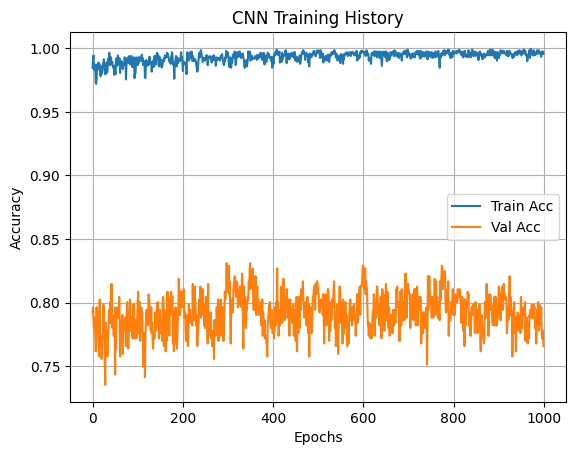

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("CNN Training History")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# Predict class probabilities
y_pred_probs = model.predict(X_test_cnn)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [72]:
# Get emotion labels back from encoding
emotion_labels = le.classes_

# Print classification report
print(classification_report(y_test, y_pred, target_names=emotion_labels))


              precision    recall  f1-score   support

       angry       0.82      0.74      0.78        80
        calm       0.63      0.70      0.67        37
     disgust       0.72      0.68      0.70        74
     fearful       0.81      0.81      0.81        67
       happy       0.77      0.86      0.81        65
         sad       0.80      0.72      0.76        79
     unknown       0.76      0.83      0.79        89

    accuracy                           0.77       491
   macro avg       0.76      0.76      0.76       491
weighted avg       0.77      0.77      0.77       491



## 💾 Step 7: Save Trained Model

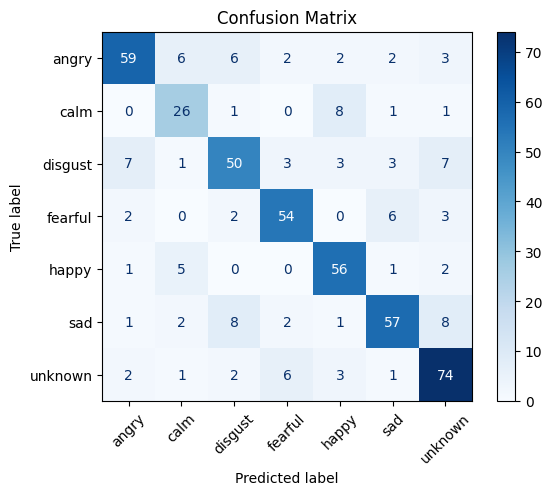

In [73]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [74]:
import pickle

# Save the trained CNN model
model.save("emotion_cnn_model.h5")  # HDF5 format, standard for Keras

# Save the LabelEncoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


## 🚀 Step 8: Create Prediction Function for Streamlit App

In [75]:
from tensorflow.keras.models import load_model
import pickle

# Load your CNN model
model = load_model("emotion_cnn_model.h5")

# Load your label encoder
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)


## 🌐 Step 9: Streamlit Web App Instructions